In [5]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

# PART 1


In [6]:
df = pd.read_csv('myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [7]:
MYOPIC = df["MYOPIC"].values
MYOPIC

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
MYOPIC_Drop = df.drop("MYOPIC", axis=1)
MYOPIC_Drop

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(MYOPIC_Drop)
print(scaled_data)

[[-4.20219106e-01 -1.36391690e+00 -8.92861464e-01 ...  4.98303926e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -3.08612235e-01 -1.71839800e-01 ... -8.75087555e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01  6.04386289e-01 -9.97682023e-03 ... -7.50233784e-01
  -1.01302987e+00 -9.96768974e-01]
 ...
 [-4.20219106e-01  1.65169621e+00  6.52187361e-01 ... -1.37450264e+00
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -2.17472219e-01 -8.48716244e-01 ... -1.88391815e-01
  -1.01302987e+00 -9.96768974e-01]
 [-4.20219106e-01  1.58339808e-03 -3.48415042e-01 ... -7.50233784e-01
   9.87137728e-01  1.00324150e+00]]


# PART 2

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
scaled_pca = pca.fit_transform(scaled_data)

In [13]:
print(scaled_pca)

[[ 0.53550271  1.14500427]
 [-0.62470559 -1.57578643]
 [-0.93347937 -0.71707622]
 ...
 [-0.89008202 -2.3080052 ]
 [-1.12399979  0.45188978]
 [-0.69153391 -0.73704619]]


In [34]:
from sklearn.manifold import TSNE

In [35]:
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(scaled_data)

C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [36]:
tsne_features.shape

(618, 2)

In [37]:
MYOPIC_Drop["class"] = df["MYOPIC"]

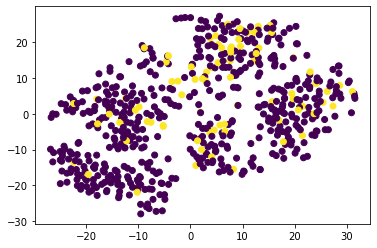

In [38]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=MYOPIC_Drop["class"])
plt.show()